In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
dfpr = pd.read_csv('Exps/phantom_routing.csv', header=None)
dftb = pd.read_csv('Exps/treebranch.csv', header=None)
dfdf = pd.read_csv('Exps/dynamicFSS.csv', header=None)
dfmy = pd.read_csv('Exps/cpstopoFakeSourceScheduling_again.csv', header=None)

In [3]:
dfpr = dfpr.set_index(keys=0).T
dftb = dftb.set_index(keys=0).T
dfdf = dfdf.set_index(keys=0).T
dfmy = dfmy.set_index(keys=0).T
df = [dfpr, dftb, dfdf, dfmy]

In [2]:
alg_names_en = ['Phantom\nrouting', 'Diversionary\nrouting', 'Dynamic\nFSS', 'Fake\nscheduling']
alg_names_zh = [u'幻影\n路由', u'诱导树\n路由', u'动态虚假源\n选择', u'虚假源\n调度']
col_names_en = ['Safety', 'Delay (ns)', 'Consumption (nJ)']
col_names_zh = [u'安全周期', u'传输时延 (ns)', u'网络能耗 (nJ)']
figformat = ['png', 'eps', 'pdf']
import matplotlib.font_manager as fm
zhfont = fm.FontProperties(fname='/home/sturui/.local/share/fonts/simsun.ttf')
matplotlib.rcParams.update({'font.size': 10, 'font.family':'serif'})

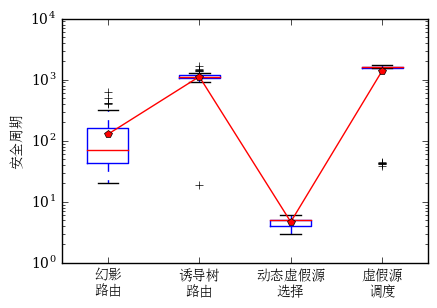

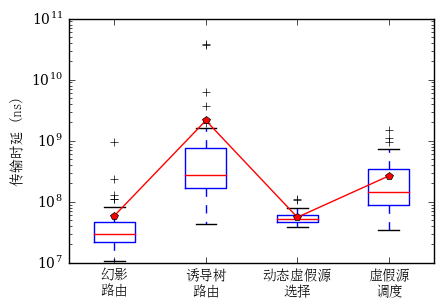

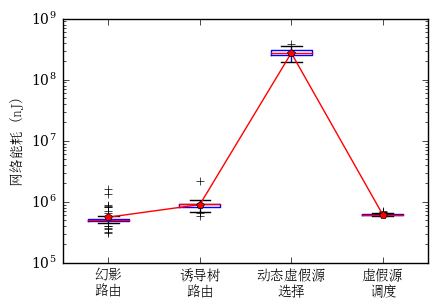

In [26]:
printflag = 'china' # 'china':中文图, otherwise:英文图
ff = figformat[2]   # 0:*.png, 1:*.eps, 2:*.pdf
for i, col in enumerate(['Tsafe', 'TR', 'Ei']):
    data_Tsafe = [data[col].values for data in df]
    plt.figure(figsize=(4.72,3.15))
    plt.boxplot(data_Tsafe, labels=alg_names_en)
    plt.plot([1, 2, 3, 4], [dat.mean() for dat in data_Tsafe], lw=1, color='red', marker='p')
    plt.yscale('log')
    
    if printflag == 'china':
        plt.ylabel(col_names_zh[i], fontproperties=zhfont)
        plt.xticks([1, 2, 3, 4], alg_names_zh, fontproperties=zhfont)
        plt.savefig('Figures/Comparasion/zh/'+col+'.'+ff, dpi=600, format=ff)
    else:
        plt.ylabel(col_names_en[i])
        plt.xticks([1, 2, 3, 4], alg_names_en)
        plt.savefig('Figures/Comparasion/en/'+col+'.'+ff, dpi=600, format=ff)
    
    plt.show()

## 新增的对比时延
1. 隐私水平：攻击者与 source 的跳数
2. 传输时延：source 与 sink 的跳数
3. 网络能耗：虚假消息每周期的转发次数

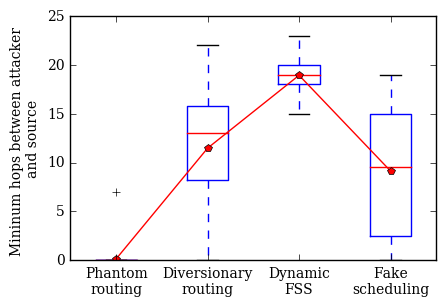

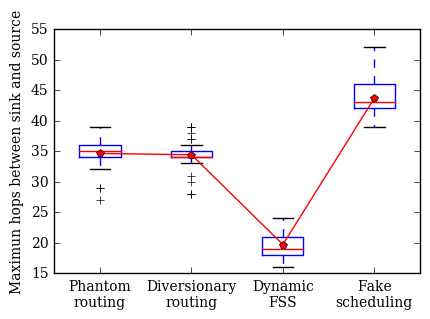

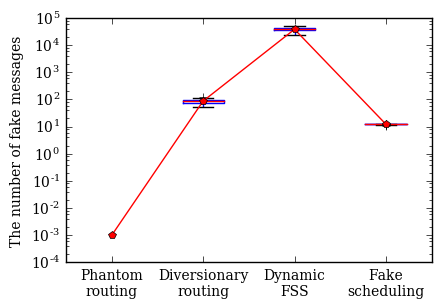

In [15]:
dfpr = pd.read_csv('Exps/phantom_routing_add.csv')
dftb = pd.read_csv('Exps/treebranch_add.csv')
dfdf = pd.read_csv('Exps/dynamicFSS_add.csv')
dfmy = pd.read_csv('Exps/cpstopoFakeSourceScheduling_add.csv')
df = [dfpr, dftb, dfdf, dfmy]
df_columns = df[0].columns
col_names_en = ['Mininum hops between attacker \nand source', 
                'Maximun hops between sink and source', 
                'The number of fake messages']
col_names_zh = [u'攻击者与源节点最接近时的跳数', u'基站与源节点的最大跳数', u'虚假消息数']

printflag = 'english' # 'china':中文图, otherwise:英文图
ff = figformat[2]   # 0:*.png, 1:*.eps, 2:*.pdf
for i, col in enumerate(df_columns):
    data = [dat[col].values for dat in df]
    plt.figure(figsize=(4.72,3.15))
    plt.boxplot(data, labels=alg_names_en)
    plt.plot([1, 2, 3, 4], [dat.mean()+np.finfo(np.float16).eps for dat in data], lw=1, color='red', marker='p')
    if i == 2:
        plt.yscale('log')
    
    if printflag == 'china':
        plt.ylabel(col_names_zh[i], fontproperties=zhfont)
        plt.xticks([1, 2, 3, 4], alg_names_zh, fontproperties=zhfont)
        plt.savefig('Figures/Comparasion/zh/'+col+'.'+ff, dpi=600, format=ff)
    else:
        plt.ylabel(col_names_en[i])
        plt.xticks([1, 2, 3, 4], alg_names_en)
        plt.savefig('Figures/Comparasion/en/'+col+'.'+ff, dpi=600, format=ff)
    
    plt.show()